# **پیش گزارش**

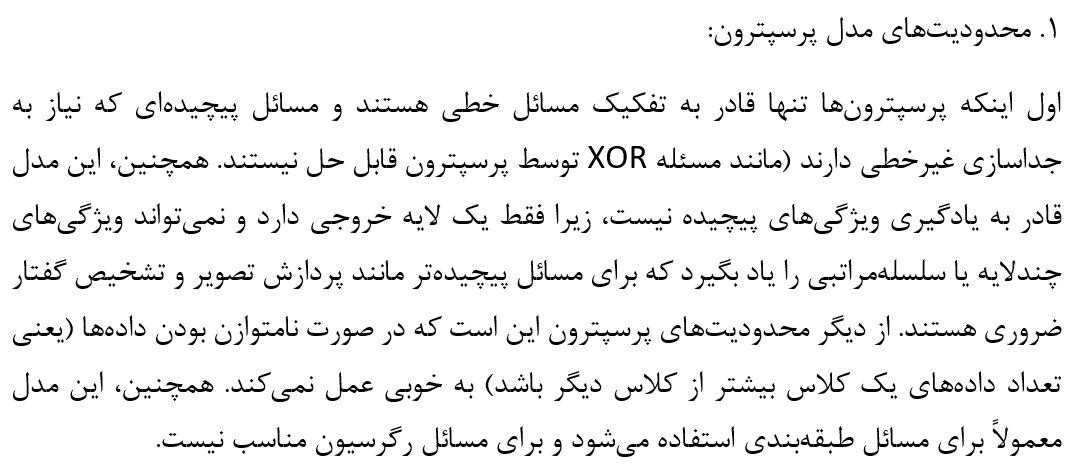

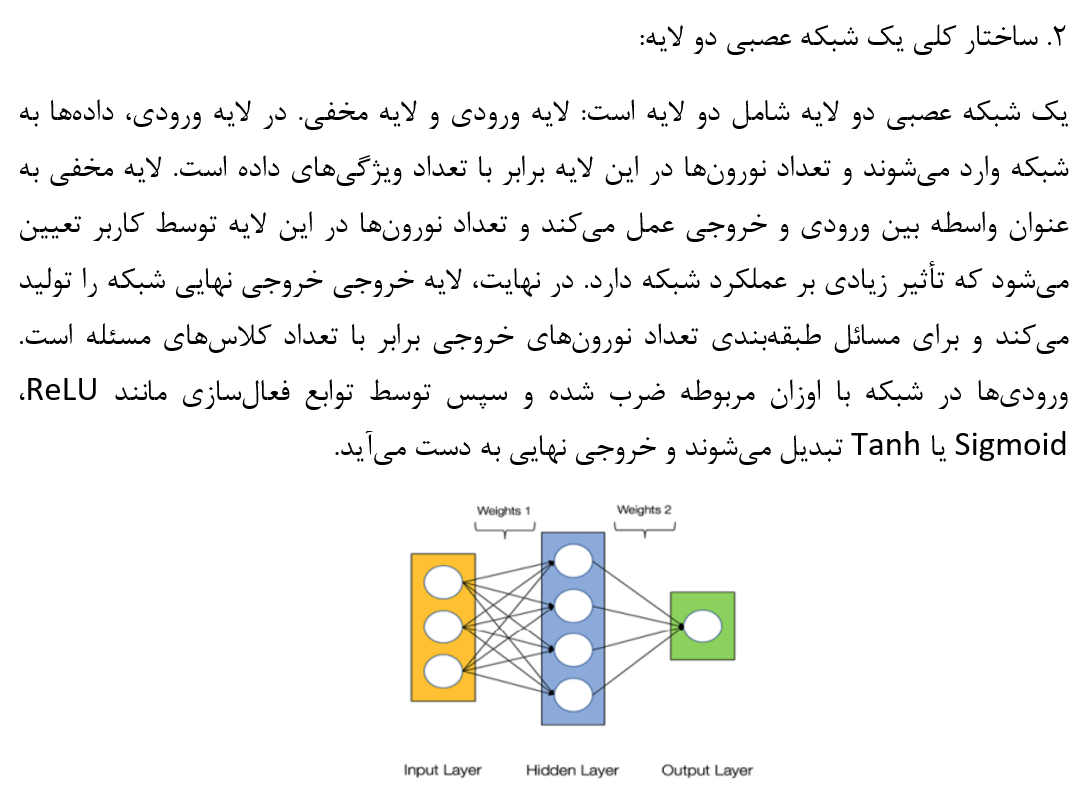

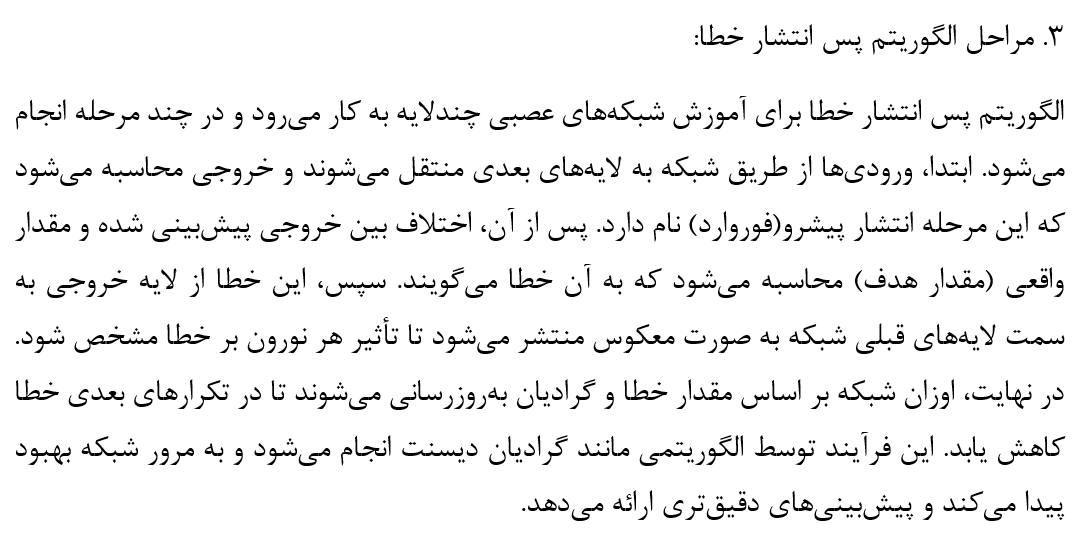

# **آزمایش**

In [ ]:
import numpy as np
X = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

y = np.array([[1], [0], [0], [1], [0], [1], [1], [0]])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

class DeepNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        output = sigmoid(self.z2)
        return output

    def backward(self, X, y, output, learning_rate=0.1):
        error = y - output
        d_output = error * sigmoid_derivative(output)

        error_hidden_layer = d_output.dot(self.W2.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(self.a1)

        self.W2 += self.a1.T.dot(d_output) * learning_rate
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.W1 += X.T.dot(d_hidden_layer) * learning_rate
        self.b1 += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    def calculate_accuracy(self, X, y):
        output = self.forward(X)
        predictions = np.round(output)
        accuracy = np.mean(predictions == y)
        return accuracy

network = DeepNetwork(input_size=3, hidden_size=4, output_size=1)

epochs = 10000
for epoch in range(epochs):
    output = network.forward(X)
    network.backward(X, y, output)

    if epoch % 1000 == 0:
        loss = np.mean(np.square(y - output))
        print(f'Epoch {epoch}, Loss: {loss}')

accuracy = network.calculate_accuracy(X, y)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')


Epoch 0, Loss: 0.280886048230355
Epoch 1000, Loss: 0.22988488002354665
Epoch 2000, Loss: 0.08227118608724572
Epoch 3000, Loss: 0.013767409161283469
Epoch 4000, Loss: 0.005798712700186065
Epoch 5000, Loss: 0.003466478010767933
Epoch 6000, Loss: 0.002416517182864053
Epoch 7000, Loss: 0.0018329439867292266
Epoch 8000, Loss: 0.0014658811725183304
Epoch 9000, Loss: 0.0012154928086587436
Accuracy of the model: 100.00%


## **تمرین**

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%       

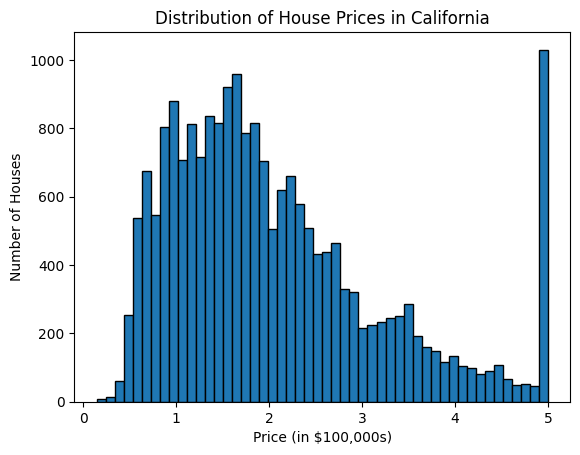

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt

california_data = fetch_california_housing()

df = pd.DataFrame(california_data.data, columns=california_data.feature_names)

df['Target'] = california_data.target

print(df.head())

print(df.describe())

plt.hist(df['Target'], bins=50, edgecolor='black')
plt.title('Distribution of House Prices in California')
plt.xlabel('Price (in $100,000s)')
plt.ylabel('Number of Houses')
plt.show()


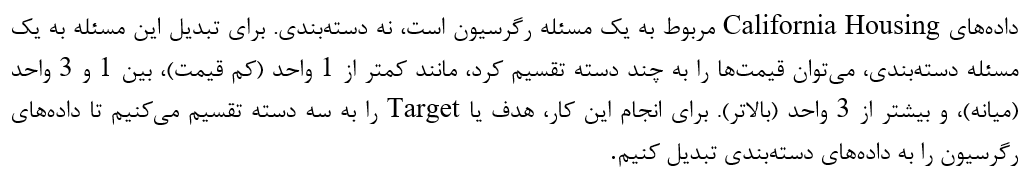

In [ ]:
df['Category'] = pd.cut(df['Target'], bins=[0, 1, 3, df['Target'].max()], labels=[0, 1, 2])
X = df.drop(['Target', 'Category'], axis=1)


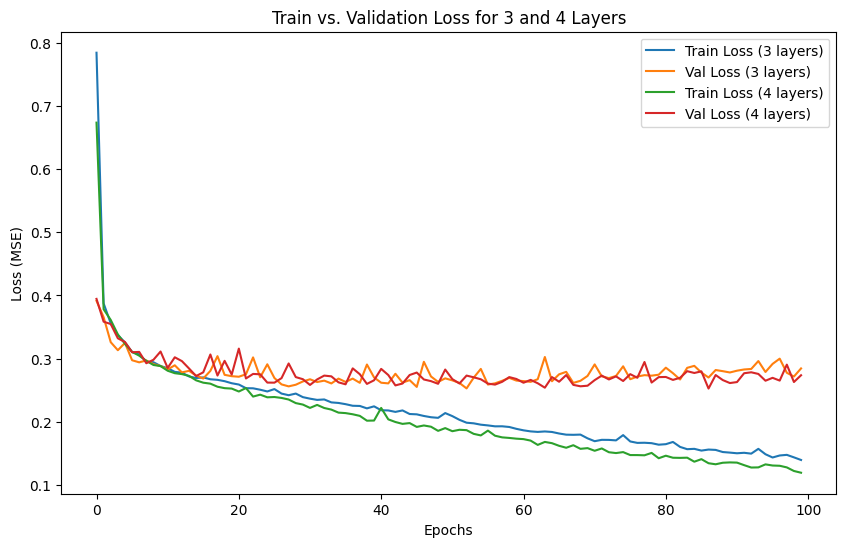

129/129 [==============================] - 0s 1ms/step - loss: 0.3076
Test Loss for 3 layers: 0.30756768584251404
129/129 [==============================] - 0s 1ms/step - loss: 0.3006
Test Loss for 4 layers: 0.3005562722682953


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, df['Target'], test_size=0.2, random_state=12)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=12)

def create_model(layers):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    for i in range(layers):
        model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

history_dict = {}

for layers in [3, 4]:
    model = create_model(layers)
    history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=0)
    history_dict[f'{layers}_layers'] = history

plt.figure(figsize=(10, 6))
for layers in [3, 4]:
    plt.plot(history_dict[f'{layers}_layers'].history['loss'], label=f'Train Loss ({layers} layers)')
    plt.plot(history_dict[f'{layers}_layers'].history['val_loss'], label=f'Val Loss ({layers} layers)')

plt.title('Train vs. Validation Loss for 3 and 4 Layers')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

for layers in [3, 4]:
    model = create_model(layers)
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
    test_loss = model.evaluate(X_test_scaled, y_test)
    print(f'Test Loss for {layers} layers: {test_loss}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


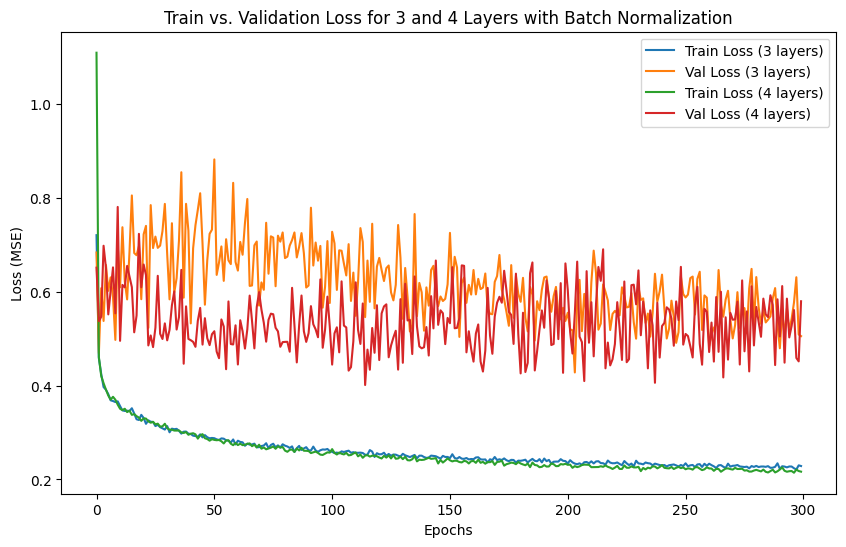

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5348
Test Loss for 3 layers with Batch Normalization: 0.5422505736351013


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5802
Test Loss for 4 layers with Batch Normalization: 0.6025658249855042


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
import matplotlib.pyplot as plt

# Assuming X and df['Target'] are already defined
X_train, X_test, y_train, y_test = train_test_split(X, df['Target'], test_size=0.2, random_state=12)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=12
)

def create_model(layers):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_scaled.shape[1]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    for i in range(layers):
        model.add(Dense(64))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

history_dict = {}

for layers in [3, 4]:
    model = create_model(layers)
    history = model.fit(
        X_train_scaled,
        y_train,
        epochs=300,
        batch_size=32,
        validation_data=(X_val_scaled, y_val),
        verbose=0
    )
    history_dict[f'{layers}_layers'] = history

plt.figure(figsize=(10, 6))
for layers in [3, 4]:
    plt.plot(
        history_dict[f'{layers}_layers'].history['loss'],
        label=f'Train Loss ({layers} layers)'
    )
    plt.plot(
        history_dict[f'{layers}_layers'].history['val_loss'],
        label=f'Val Loss ({layers} layers)'
    )

plt.title('Train vs. Validation Loss for 3 and 4 Layers with Batch Normalization')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

for layers in [3, 4]:
    model = create_model(layers)
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
    test_loss = model.evaluate(X_test_scaled, y_test)
    print(f'Test Loss for {layers} layers with Batch Normalization: {test_loss}')




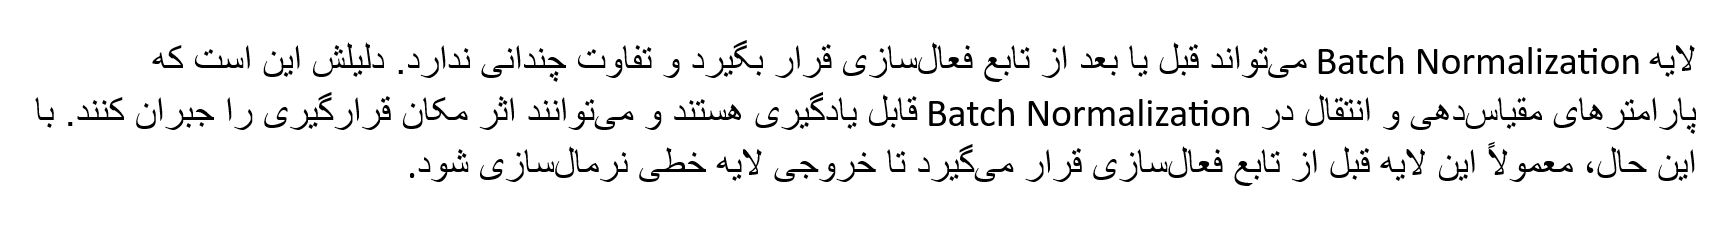